# 1

In [1]:
cars <- read.csv("CARS.csv")
cars$MSRP <- as.numeric(gsub("[\\$,]", "", cars$MSRP))
cars$Invoice <- as.numeric(gsub("[\\$,]", "", cars$Invoice))

# 1) Проверка влияния Origin на MPG_City
cars$Origin <- as.factor(cars$Origin)

model1 <- aov(MPG_City ~ Origin, data = cars)
anova_table1 <- summary(model1)
anova_table1

             Df Sum Sq Mean Sq F value   Pr(>F)    
Origin        2    962   481.1   19.01 1.24e-08 ***
Residuals   425  10754    25.3                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Так как p-value  сильно меньше 0.01 значит отвергаем гипотезу что Origin не влияет на MPG_City

# 2

In [2]:
# Заданный уровень значимости (alpha) = 0.01
# Уровень доверия для интервалов будет 1 - 0.01 = 0.99
alpha <- 0.01
conf_level <- 1 - alpha

# Выполняем тест Тьюки для всех попарных сравнений
tukey_results <- TukeyHSD(model1, conf.level = conf_level)

# Выводим результаты теста
print("--- Результаты теста Тьюки (Tukey's HSD) ---")
print(tukey_results)


[1] "--- Результаты теста Тьюки (Tukey's HSD) ---"
  Tukey multiple comparisons of means
    99% family-wise confidence level

Fit: aov(formula = MPG_City ~ Origin, data = cars)

$Origin
                  diff       lwr       upr     p adj
Europe-Asia -3.2809509 -5.052770 -1.509132 0.0000003
USA-Asia    -2.9378283 -4.626363 -1.249294 0.0000016
USA-Europe   0.3431226 -1.457480  2.143725 0.8423173



По результатам теста:
- Сравнение 'USA-Europe' показало p-value > 0.01.
 - Это означает, что группы 'USA' и 'Europe' "неразличимы"
   на заданном уровне значимости.
 - Мы должны объединить их в одну новую группу: 'Asia_Europe'.
 - Группа 'Asia' статистически значимо отличается от обеих,
   поэтому она остается отдельной.

In [3]:
# Создаем новую колонку 'Origin_Grouped'
cars$Origin_Grouped <- as.character(cars$Origin)

# Выполняем замену
cars$Origin_Grouped[cars$Origin == "USA"] <- "USA-Europe"
cars$Origin_Grouped[cars$Origin == "Europe"] <- "USA-Europe"

# Преобразуем новую колонку обратно в фактор
cars$Origin_Grouped <- as.factor(cars$Origin_Grouped)

# 4. Проверка результата
# ------------------------------------
print("--- Новые объединенные группы ---")
# Посмотрим, сколько наблюдений в каждой новой группе
print(table(cars$Origin_Grouped))

[1] "--- Новые объединенные группы ---"

      Asia USA-Europe 
       158        270 


In [4]:
# 5. Проверяем, остались ли различия после объединения
model2 <- aov(MPG_City ~ Origin_Grouped, data = cars)
summary(model2)

                Df Sum Sq Mean Sq F value   Pr(>F)    
Origin_Grouped   1    954   954.2   37.77 1.83e-09 ***
Residuals      426  10762    25.3                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Видим низкий p-value => группы все еще различимы

# 3

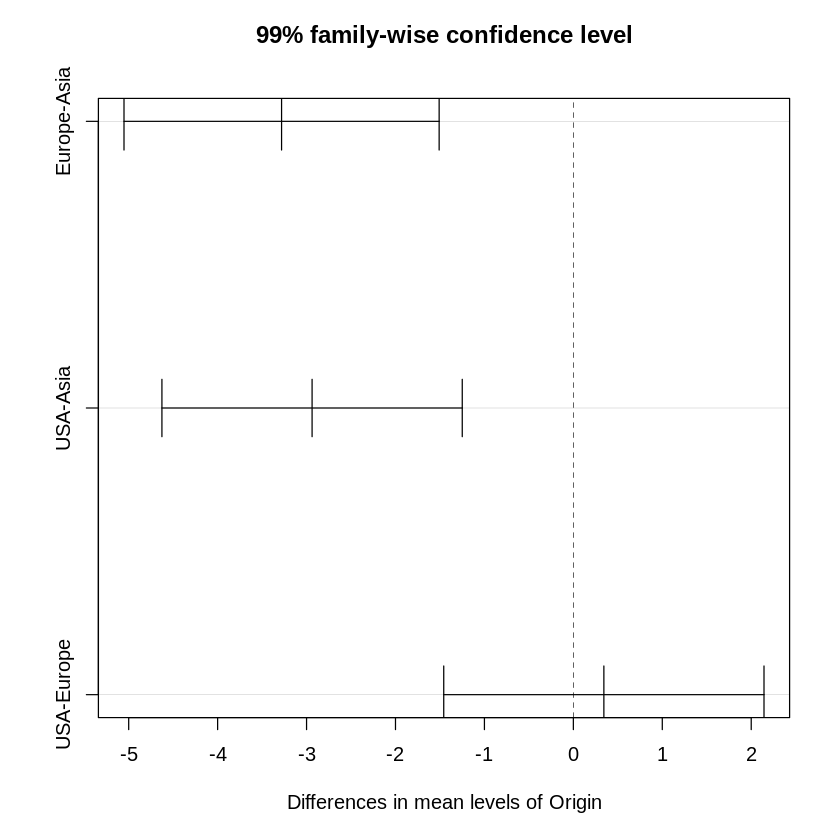

In [5]:
plot(tukey_results)

# 4

In [6]:
# 4. Добавление предиктора Type к модели с группированным Origin
model_origin <- aov(MPG_City ~ Origin_Grouped, data = cars)
model_combined <- aov(MPG_City ~ Origin_Grouped + Type, data = cars)

# Сравнение моделей через F-тест
comparison <- anova(model_origin, model_combined)
print(comparison)

# Дополнительно: вывод итоговой модели
summary(model_combined)


Analysis of Variance Table

Model 1: MPG_City ~ Origin_Grouped
Model 2: MPG_City ~ Origin_Grouped + Type
  Res.Df   RSS Df Sum of Sq      F    Pr(>F)    
1    426 10762                                  
2    421  5724  5    5038.2 74.111 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


                Df Sum Sq Mean Sq F value   Pr(>F)    
Origin_Grouped   1    954   954.2   70.18 8.14e-16 ***
Type             5   5038  1007.6   74.11  < 2e-16 ***
Residuals      421   5724    13.6                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

F = 74.111 - это очень большое значение
p-value < 2.2e-16 - вероятность, что это случайность, практически нулевая

Вывод: добавление Type очень сильно улучшило модель.
Проще говоря: тип кузова действительно помогает лучше предсказывать расход топлива в городе.



# 5

In [8]:
install.packages('multcomp')
install.packages('dplyr')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘zoo’, ‘mvtnorm’, ‘TH.data’, ‘sandwich’




Analysis of Variance Table

Model 1: MPG_City ~ Origin_Grouped + Type
Model 2: MPG_City ~ Origin_Grouped * Type
  Res.Df    RSS Df Sum of Sq      F Pr(>F)
1    421 5724.0                           
2    417 5714.7  4    9.3083 0.1698 0.9537
Эффект взаимодействия незначим (p = 0.9537366 ). Исключаем из модели.


Loading required package: mvtnorm

Loading required package: survival

Loading required package: TH.data

Loading required package: MASS


Attaching package: ‘TH.data’


The following object is masked from ‘package:MASS’:

    geyser




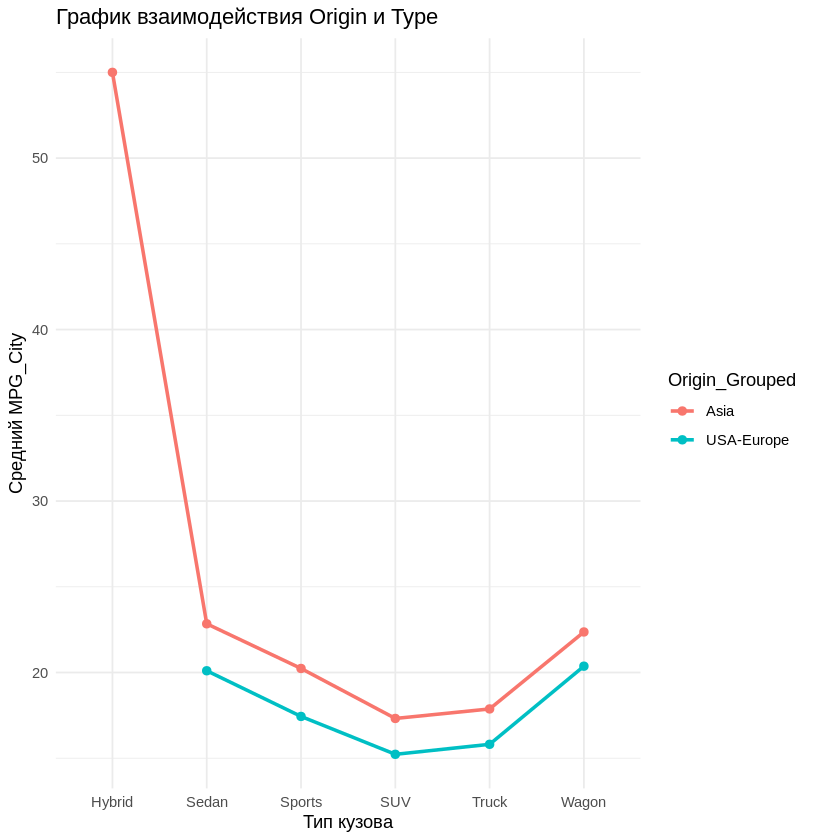

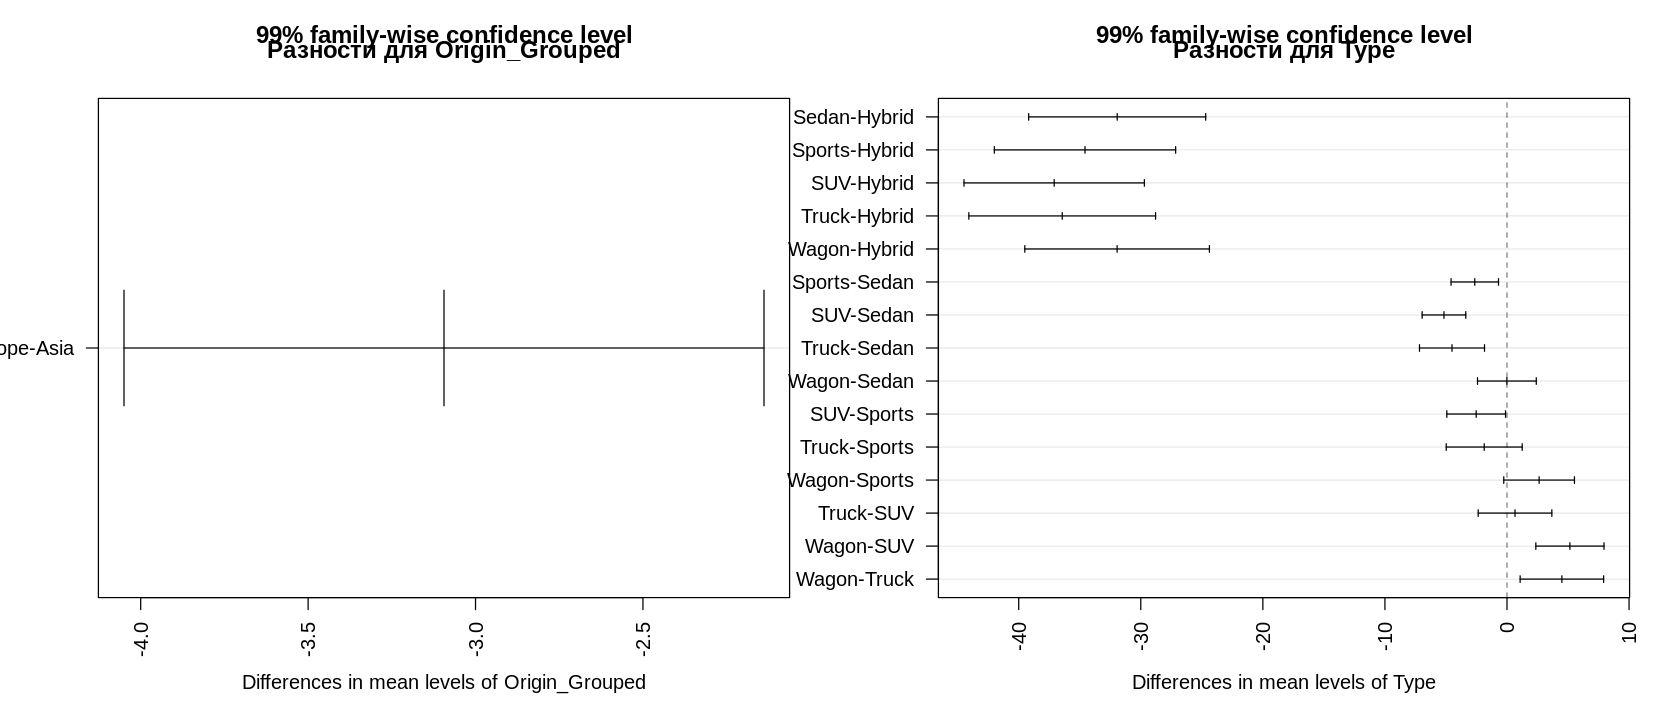

In [9]:
# 1. Построение моделей с взаимодействием и без
model_with_interaction <- aov(MPG_City ~ Origin_Grouped * Type, data = cars)
model_without_interaction <- aov(MPG_City ~ Origin_Grouped + Type, data = cars)

# 2. Сравнение моделей через критерий Фишера (ANOVA)
comparison <- anova(model_without_interaction, model_with_interaction)
print(comparison)

# 3. График взаимодействия
library(ggplot2)
interaction_plot <- ggplot(cars, aes(x = Type, y = MPG_City, color = Origin_Grouped, group = Origin_Grouped)) +
  stat_summary(fun = mean, geom = "line", size = 1) +
  stat_summary(fun = mean, geom = "point", size = 2) +
  labs(title = "График взаимодействия Origin и Type", x = "Тип кузова", y = "Средний MPG_City") +
  theme_minimal()
print(interaction_plot)

# 4. Проверка значимости взаимодействия
p_value_interaction <- comparison$`Pr(>F)`[2]
if (p_value_interaction > 0.01) {
  final_model <- model_without_interaction
  cat("Эффект взаимодействия незначим (p =", p_value_interaction, "). Исключаем из модели.\n")
} else {
  final_model <- model_with_interaction
  cat("Эффект взаимодействия значим (p =", p_value_interaction, "). Оставляем в модели.\n")
}

# 5. Визуализация попарных разностей для финальной модели
library(multcomp)
if (p_value_interaction > 0.01) {
  # Модель без взаимодействия: отдельные сравнения для Origin и Type
  tukey_origin <- TukeyHSD(final_model, "Origin_Grouped", conf.level = 0.99)
  tukey_type <- TukeyHSD(final_model, "Type", conf.level = 0.99)
  options(repr.plot.width = 14, repr.plot.height = 6)
  par(mfrow = c(1, 2))
  plot(tukey_origin, las = 2)
  title("Разности для Origin_Grouped")

  plot(tukey_type, las = 2)
  title("Разности для Type")


} else {
  # Модель с взаимодействием: сравнения для комбинаций Origin:Type
  posthoc <- glht(final_model, linfct = mcp(Origin = "Tukey", Type = "Tukey"))
  plot(posthoc, main = "Diffogram для Origin:Type")
}

Видим что графики у Азии и Европа_США примерно похожи и p-value высокое то есть приходим к выводу что добавление взаимодействия происхождения и типа излишне

# 6

In [10]:
install.packages('multcomp')
install.packages('dplyr')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [11]:
library(multcomp)
library(dplyr)

cars$Group <- with(cars,
  ifelse((Origin %in% c("Europe", "Asia")) & (Type == "Sedan"),
         "Eurasia_Sedan",
  ifelse((Origin == "USA") & (Type == "Truck"),
         "USA_Truck",
         NA))
)

data_filtered <- cars %>% filter(!is.na(Group))

model <- lm(MPG_City ~ Group, data = data_filtered)

# контраст: Eurasia_Sedan - USA_Truck = 0
# В модели коэффициенты: (Intercept) = Eurasia_Sedan, GroupUSA_Truck = разница
# Поэтому контраст: (1, -1) для (Intercept, GroupUSA_Truck)
contrast <- matrix(c(1, -1), nrow = 1)
glht_test <- glht(model, linfct = contrast)
summary(glht_test)



Attaching package: ‘dplyr’


The following object is masked from ‘package:MASS’:

    select


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union





	 Simultaneous Tests for General Linear Hypotheses

Fit: lm(formula = MPG_City ~ Group, data = data_filtered)

Linear Hypotheses:
       Estimate Std. Error t value Pr(>|t|)    
1 == 0   26.850      1.306   20.56   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)


In [13]:
# t-тест
t_test_result <- t.test(MPG_City ~ Group, data = data_filtered, var.equal = TRUE)
print(t_test_result)

# ANOVA
anova_result <- aov(MPG_City ~ Group, data = data_filtered)
summary(anova_result)


	Two Sample t-test

data:  MPG_City by Group
t = 4.7352, df = 186, p-value = 4.328e-06
alternative hypothesis: true difference in means between group Eurasia_Sedan and group USA_Truck is not equal to 0
95 percent confidence interval:
 3.219588 7.818202
sample estimates:
mean in group Eurasia_Sedan     mean in group USA_Truck 
                    21.3314                     15.8125 



             Df Sum Sq Mean Sq F value   Pr(>F)    
Group         1    446   445.9   22.42 4.33e-06 ***
Residuals   186   3699    19.9                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

p-value < 0.01, значит гипотеза о равенстве средних отвергается

# 7

Тест Шапиро-Уилка на нормальность:

	Shapiro-Wilk normality test

data:  residuals(anova_result)
W = 0.87903, p-value = 3.703e-11


F-тест на равенство дисперсий:

	F test to compare two variances

data:  MPG_City by Group
F = 2.85, num df = 171, denom df = 15, p-value = 0.02319
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 1.167169 5.446548
sample estimates:
ratio of variances 
          2.849997 


Тест Бартлетта на равенство дисперсий:

	Bartlett test of homogeneity of variances

data:  MPG_City by Group
Bartlett's K-squared = 5.5839, df = 1, p-value = 0.01813



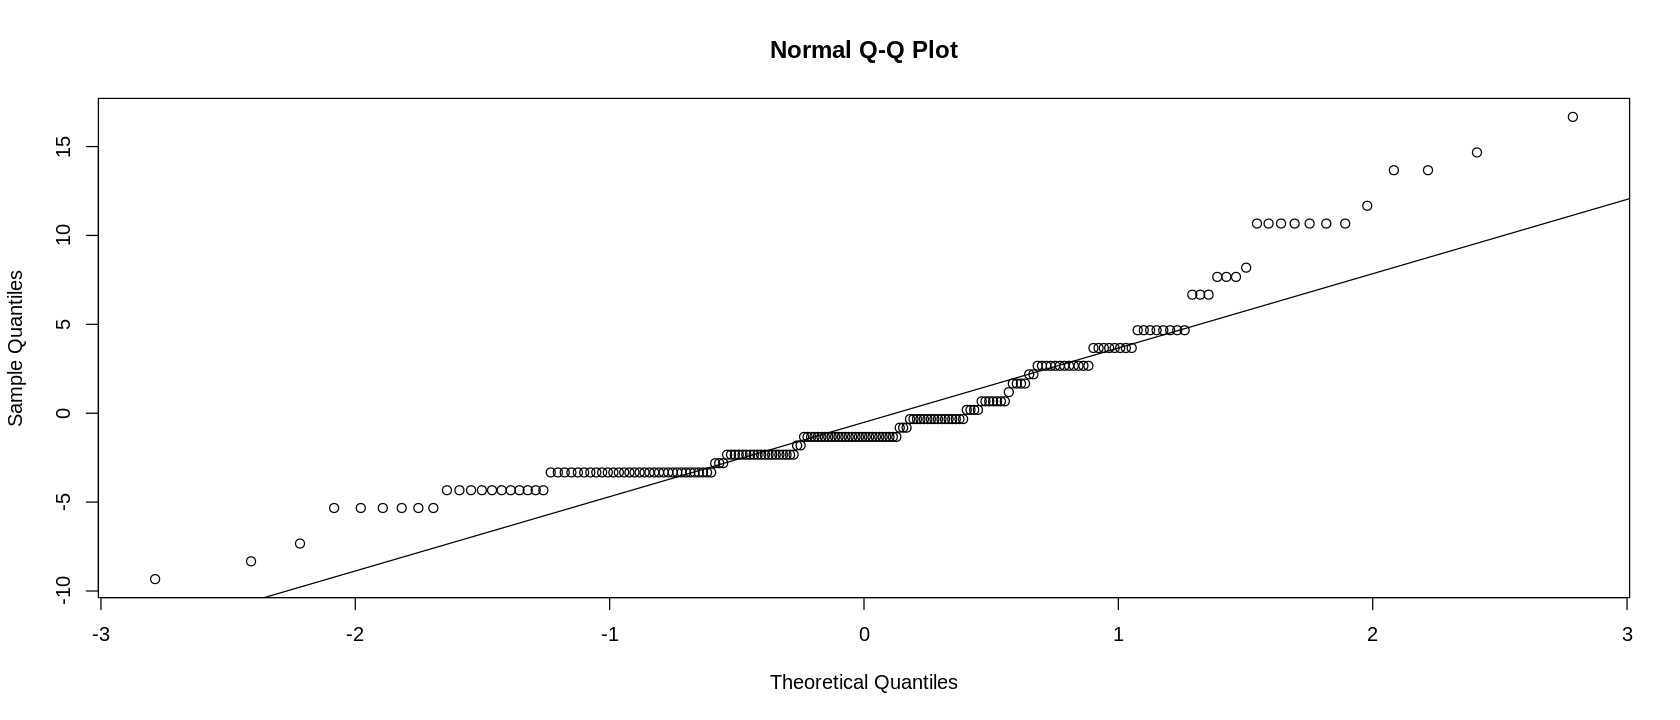

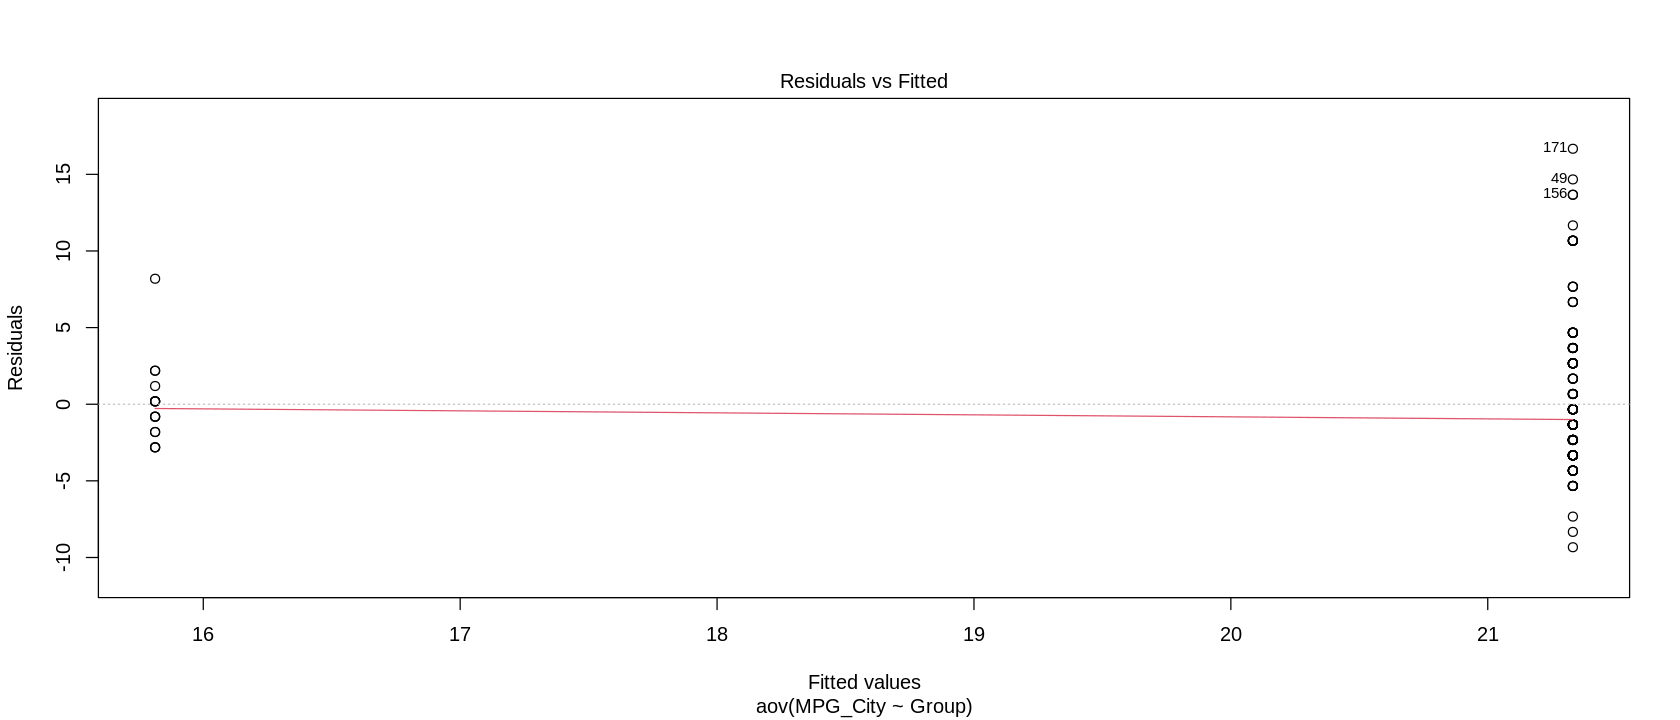

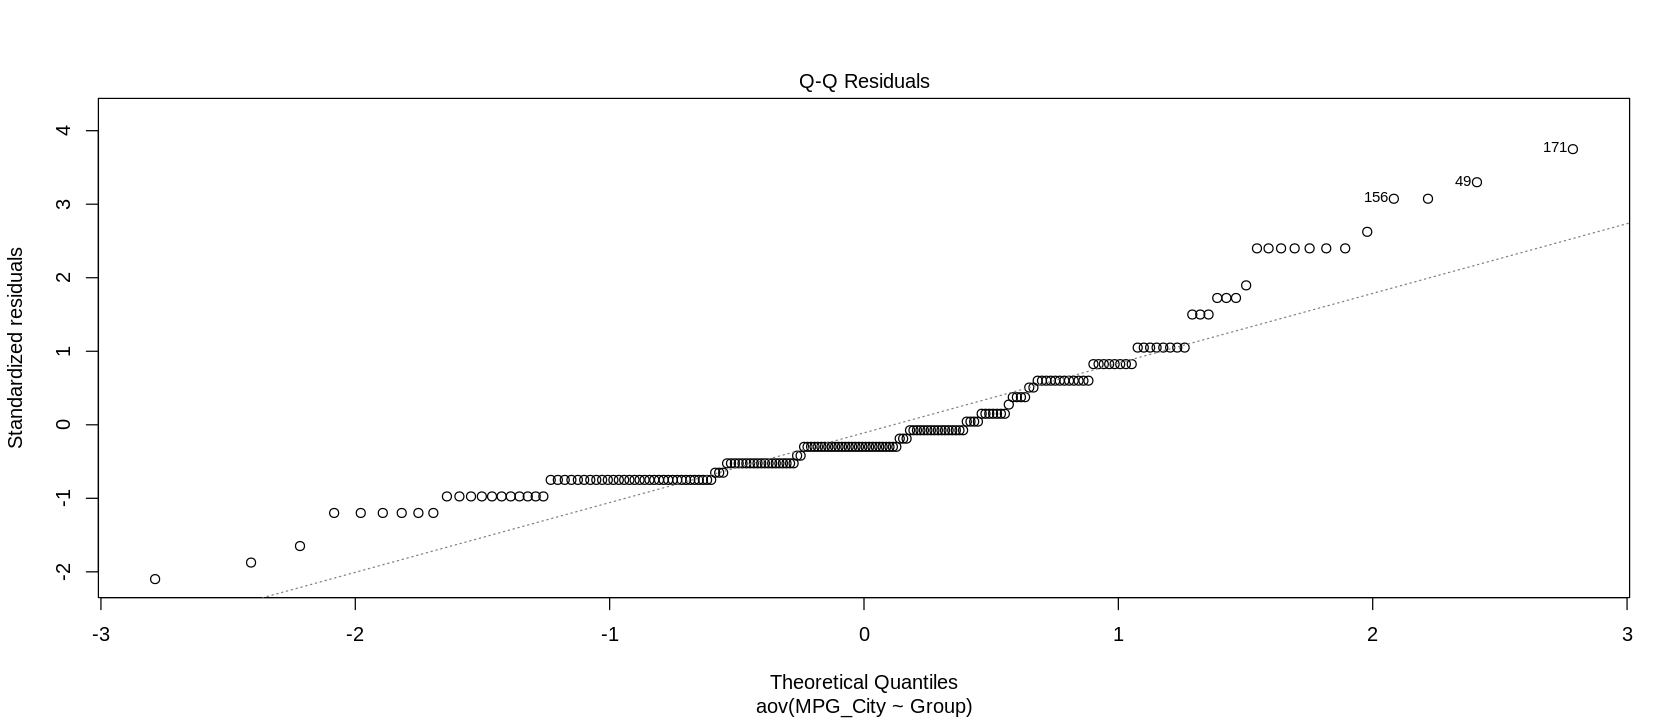

In [19]:
# 7. Проверка требований применимости модели
# Нормальность остатков
shapiro_test <- shapiro.test(residuals(anova_result))
cat("Тест Шапиро-Уилка на нормальность:\n")
print(shapiro_test)

# График нормальности
qqnorm(residuals(anova_result))
qqline(residuals(anova_result))

# Равенство дисперсий - используем F-тест вместо теста Левене
var_test <- var.test(MPG_City ~ Group, data = data_filtered)
cat("\nF-тест на равенство дисперсий:\n")
print(var_test)

# Альтернатива: тест Бартлетта (встроенный в R)
bartlett_test <- bartlett.test(MPG_City ~ Group, data = data_filtered)
cat("\nТест Бартлетта на равенство дисперсий:\n")
print(bartlett_test)

# График остатков для визуальной оценки
plot(anova_result, which = 1) # Остатки vs предсказанные значения
plot(anova_result, which = 2) # Q-Q plot

Интерпретация результатов пункта 7:
1. Нормальность распределения:
Тест Шапиро-Уилка:

p-value < 0.01 - отвергаем нулевую гипотезу о нормальности

Q-Q plot подтверждает:

Точки значительно отклоняются от прямой линии

2. Равенство дисперсий:
F-тест:

p-value = 0.02319

p-value > 0.01 - не отвергаем гипотезу о равенстве дисперсий на уровне 0.01

Тест Бартлетта:

p-value = 0.01813

p-value > 0.01 - аналогичный вывод

3. Residuals vs Fitted plot:
Остатки неравномерно разбросаны вокруг нуля

Наблюдается гетероскедастичность (непостоянство дисперсий)


# 8

In [22]:
kruskal_test <- kruskal.test(MPG_City ~ Group, data = data_filtered)
print(kruskal_test)


	Kruskal-Wallis rank sum test

data:  MPG_City by Group
Kruskal-Wallis chi-squared = 29.027, df = 1, p-value = 7.136e-08



Интерпретация результатов:

chi-squared = 29.027 - большая величина, указывающая на сильные различия

df = 1 - сравниваются 2 группы

p-value = 7.136e-08 - экстремально малый (0.00000007136)

Гипотеза ОТВЕРГАЕТСЯ - существует статистически значимое различие в медианах расхода топлива между группами

